# **Diamonds Price Prediction - Group-based Project**
***Team Members (Collaborators): -***<br>
_1- Hekar A. Mohammed._<br>
_2- Musaad Alhamami._<br>
_3- Omar Shaqfeh._<br>

## **Overview**
In this project, we aim to build a regression model that predicts the diamonds price based on our existing data.

## **Data Explanation**

**This venerable collection contains information about around 54,000 diamonds, including their prices and other characteristics. This dataset is great for people who are just getting started with data analysis and visualization.**

Now, we'll explore each column and describe it to get the full meaning based on the original source of the data:

| Column      | Description                                                                     
|-------------|---------------------------------------------------------------------------------
| **price**   | Price in US dollars (\\$326 -- $18,823).
| **carat**   | Weight of the diamond (0.2--5.01).
| **cut**     | Quality of the cut (Fair, Good, Very Good, Premium, Ideal).
| **color**   | Diamond color, from J (worst) to D (best).
| **clarity** | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
| **x**       | Length in mm (0--10.74).
| **y**       | Width in mm (0--58.9)
| **z**       | Depth in mm (0--31.8).
| **depth**   | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79).
| **table**   | Width of top of diamond relative to widest point (43--95).

**Additionally, our dataset has been divided into two files as follows: -** 
- The training set is in ***train.csv***.
- The testing set is in ***test.csv***.

## **Setup Kaggle environment necessities**

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diamond-price-prediction/train.csv
/kaggle/input/diamond-price-prediction/test.csv


## **Import the needed libraries**

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
from sklearn import metrics
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, MaxAbsScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## **Loading our dataset (Training & Testing)**

In [3]:
train_dataset = pd.read_csv('/kaggle/input/diamond-price-prediction/train.csv')
test_dataset = pd.read_csv('/kaggle/input/diamond-price-prediction/test.csv')

## **Examining our dataset**

In [4]:
# Display the first few rows
train_dataset.head()

Id  carat      cut color clarity  depth  table  price     x     y     z
0   1   1.06    Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07
1   2   1.51  Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  4.51
2   3   0.32    Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71
3   4   0.53    Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19
4   5   0.70  Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50

In [5]:
# Display the last few rows
train_dataset.tail()

Id  carat        cut color clarity  depth  table  price     x     y  \
43147  43148   0.52      Ideal     E     VS2   61.5   56.0   1760  5.16  5.18   
43148  43149   0.72  Very Good     D     VS2   62.1   59.0   3016  5.70  5.73   
43149  43150   0.44    Premium     I    VVS1   61.5   58.0    990  4.95  4.87   
43150  43151   0.31    Premium     E     VS1   60.2   58.0    734  4.38  4.43   
43151  43152   0.33      Ideal     G     VS2   61.2   55.0    743  4.49  4.46   

          z  
43147  3.18  
43148  3.55  
43149  3.02  
43150  2.65  
43151  2.74

In [6]:
# Display the dataset's shape (rows, columns)
train_dataset.shape

(43152, 11)

In [7]:
# Display dataset's info (column data types, non-null values, etc.)
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


**Great!**<br>
**Now, we can infer that we have 3 categorical and 7 numerical columns as the following: -**
* **Categorical**:
    - cut. 
    - color.
    - clarity.
* **Numerical**:
    - carat. 
    - depth.
    - table.
    - price.
    - x.
    - y.
    - z.

In [8]:
# Display basic statistics for numeric columns
train_dataset.describe()

Id         carat         depth         table         price  \
count  43152.000000  43152.000000  43152.000000  43152.000000  43152.000000   
mean   21576.500000      0.797855     61.747177     57.458347   3929.491912   
std    12457.053745      0.473594      1.435454      2.233904   3985.527795   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    10788.750000      0.400000     61.000000     56.000000    947.750000   
50%    21576.500000      0.700000     61.800000     57.000000   2401.000000   
75%    32364.250000      1.040000     62.500000     59.000000   5312.000000   
max    43152.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  43152.000000  43152.000000  43152.000000  
mean       5.731568      5.735018      3.538568  
std        1.121279      1.148809      0.708238  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

## **Check and Handle Missing Values and Data Anamolies**

In [9]:
train_dataset.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
train_dataset.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
train_dataset.nunique()

Id         43152
carat        266
cut            5
color          7
clarity        8
depth        179
table        121
price      10640
x            546
y            543
z            368
dtype: int64

In [12]:
train_dataset.duplicated().sum()

0

In [13]:
# Dropping zeros to make sure our measurement units have a weight.
train_dataset = train_dataset.drop(train_dataset[train_dataset["x"]==0].index)
train_dataset = train_dataset.drop(train_dataset[train_dataset["y"]==0].index)
train_dataset = train_dataset.drop(train_dataset[train_dataset["z"]==0].index)
train_dataset.shape

(43135, 11)

In [14]:
# Dropping the outliers. 
train_dataset = train_dataset[(train_dataset["depth"]<75)&(train_dataset["depth"]>45)]
train_dataset = train_dataset[(train_dataset["table"]<80)&(train_dataset["table"]>40)]
train_dataset = train_dataset[(train_dataset["x"]<30)]
train_dataset = train_dataset[(train_dataset["y"]<30)]
train_dataset = train_dataset[(train_dataset["z"]<30)&(train_dataset["z"]>2)]
train_dataset.shape

(43123, 11)

## **Analyze the Correlation between our data features**

In [15]:
correlation_matrix = train_dataset.corr()

/tmp/ipykernel_4231/2219645296.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_dataset.corr()


In [16]:
correlation_matrix

Id     carat     depth     table     price         x         y  \
Id     1.000000  0.001097 -0.000966 -0.001064 -0.001179 -0.000695 -0.000682   
carat  0.001097  1.000000  0.024982  0.182850  0.921868  0.977921  0.977047   
depth -0.000966  0.024982  1.000000 -0.308235 -0.012773 -0.028869 -0.031615   
table -0.001064  0.182850 -0.308235  1.000000  0.128278  0.198177  0.191912   
price -0.001179  0.921868 -0.012773  0.128278  1.000000  0.887148  0.888862   
x     -0.000695  0.977921 -0.028869  0.198177  0.887148  1.000000  0.998640   
y     -0.000682  0.977047 -0.031615  0.191912  0.888862  0.998640  1.000000   
z     -0.000911  0.977168  0.093650  0.156533  0.882801  0.991668  0.991346   

              z  
Id    -0.000911  
carat  0.977168  
depth  0.093650  
table  0.156533  
price  0.882801  
x      0.991668  
y      0.991346  
z      1.000000

<AxesSubplot: >

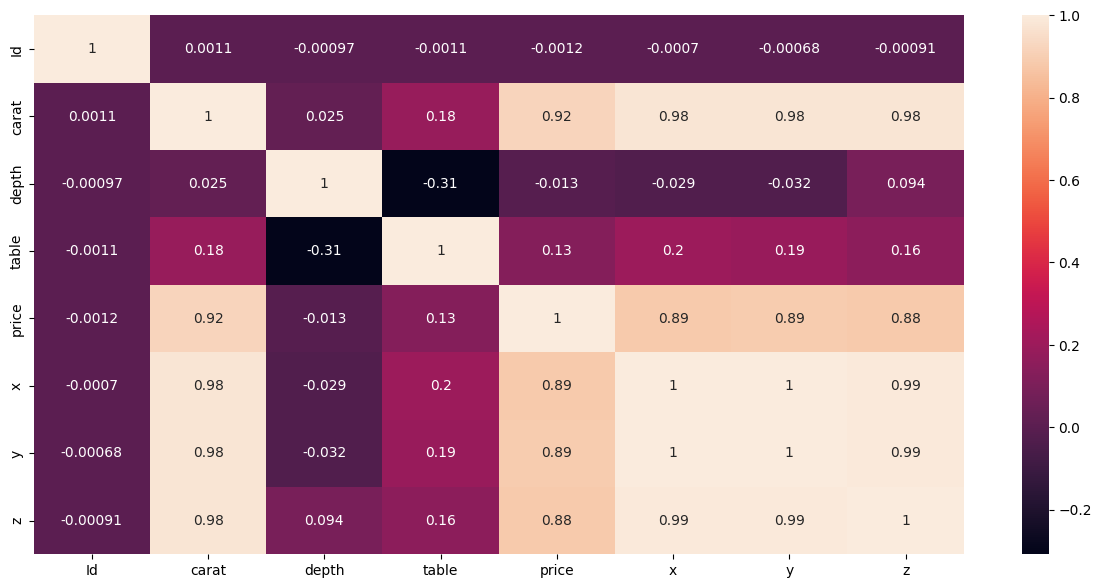

In [17]:
# Correlation heatmap
plt.figure(figsize = (15, 7))
sns.heatmap(correlation_matrix, annot=True)

**Based on the two cells of the previous outputs, we can infer that our numerical attributes 'price' and 'carat' correlated to each other, whilst the remaining have no correlations (Or have unnoticed correlations)**

## **Visualize the Data**

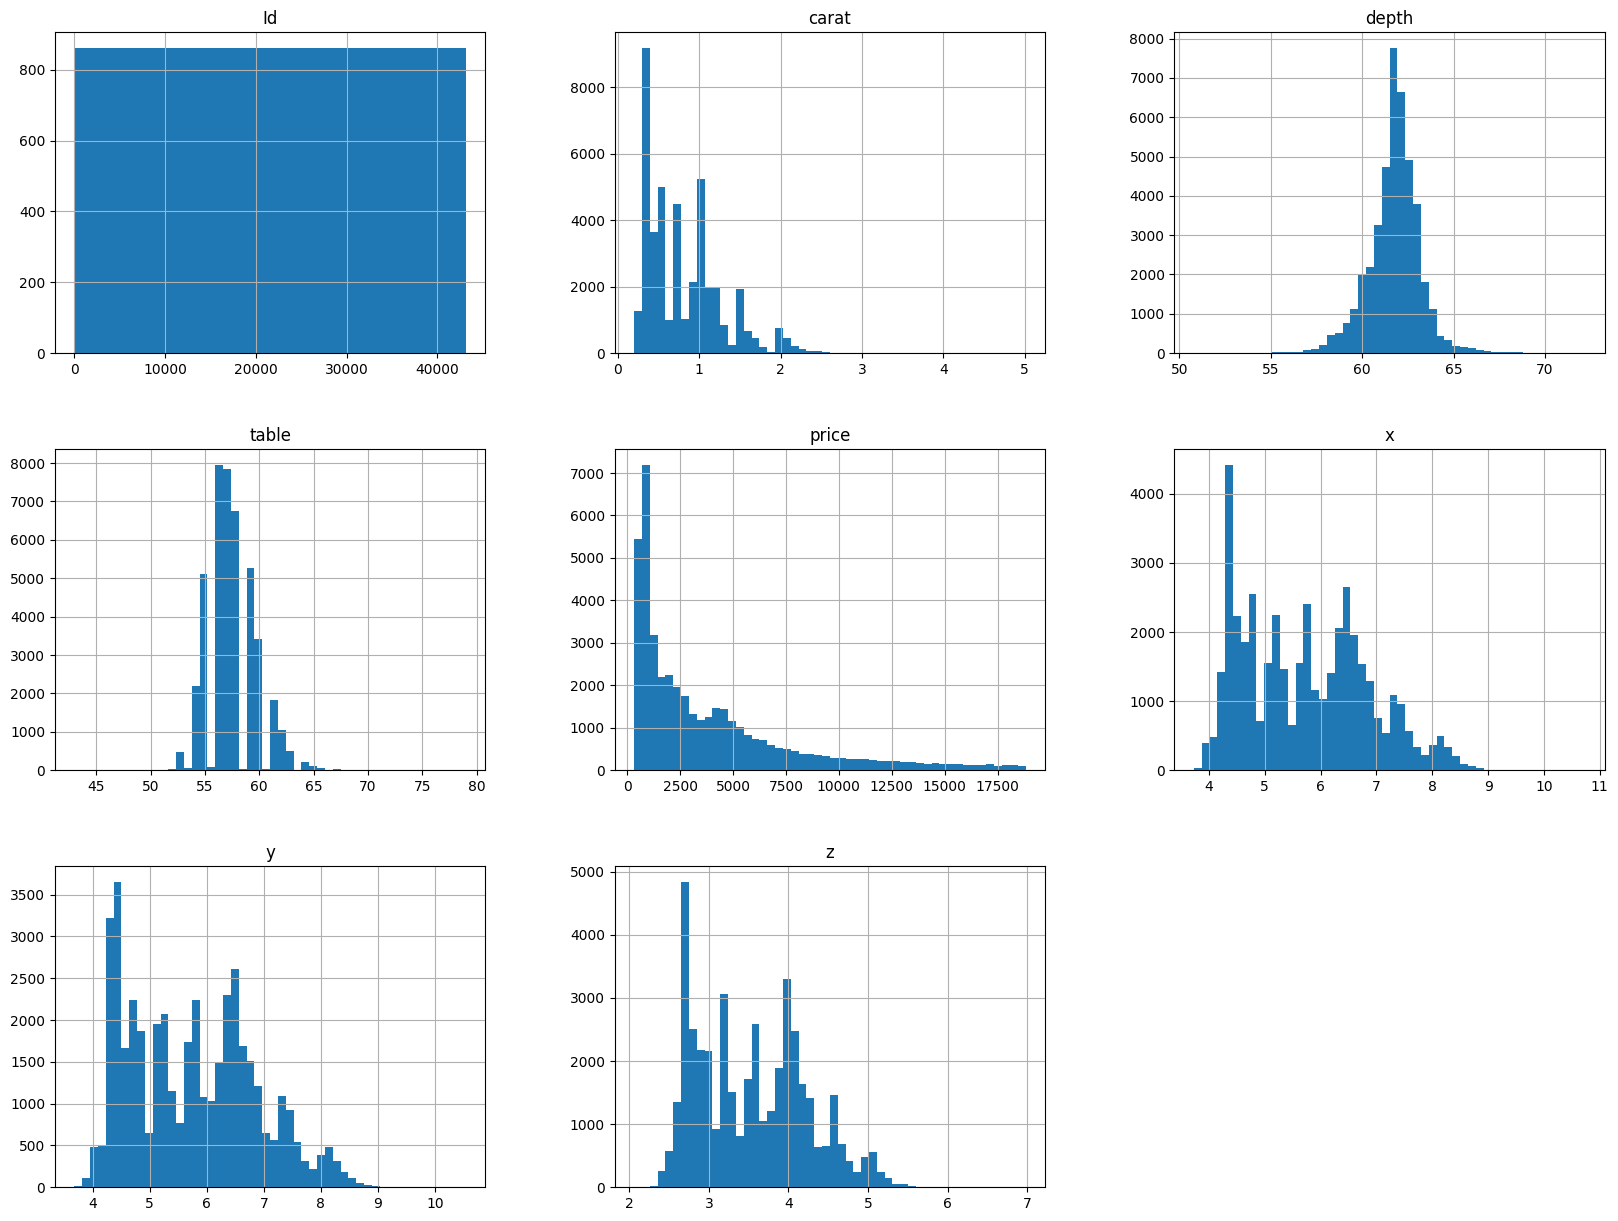

In [18]:
train_dataset.hist(bins=50,figsize=(20,15))
plt.show()

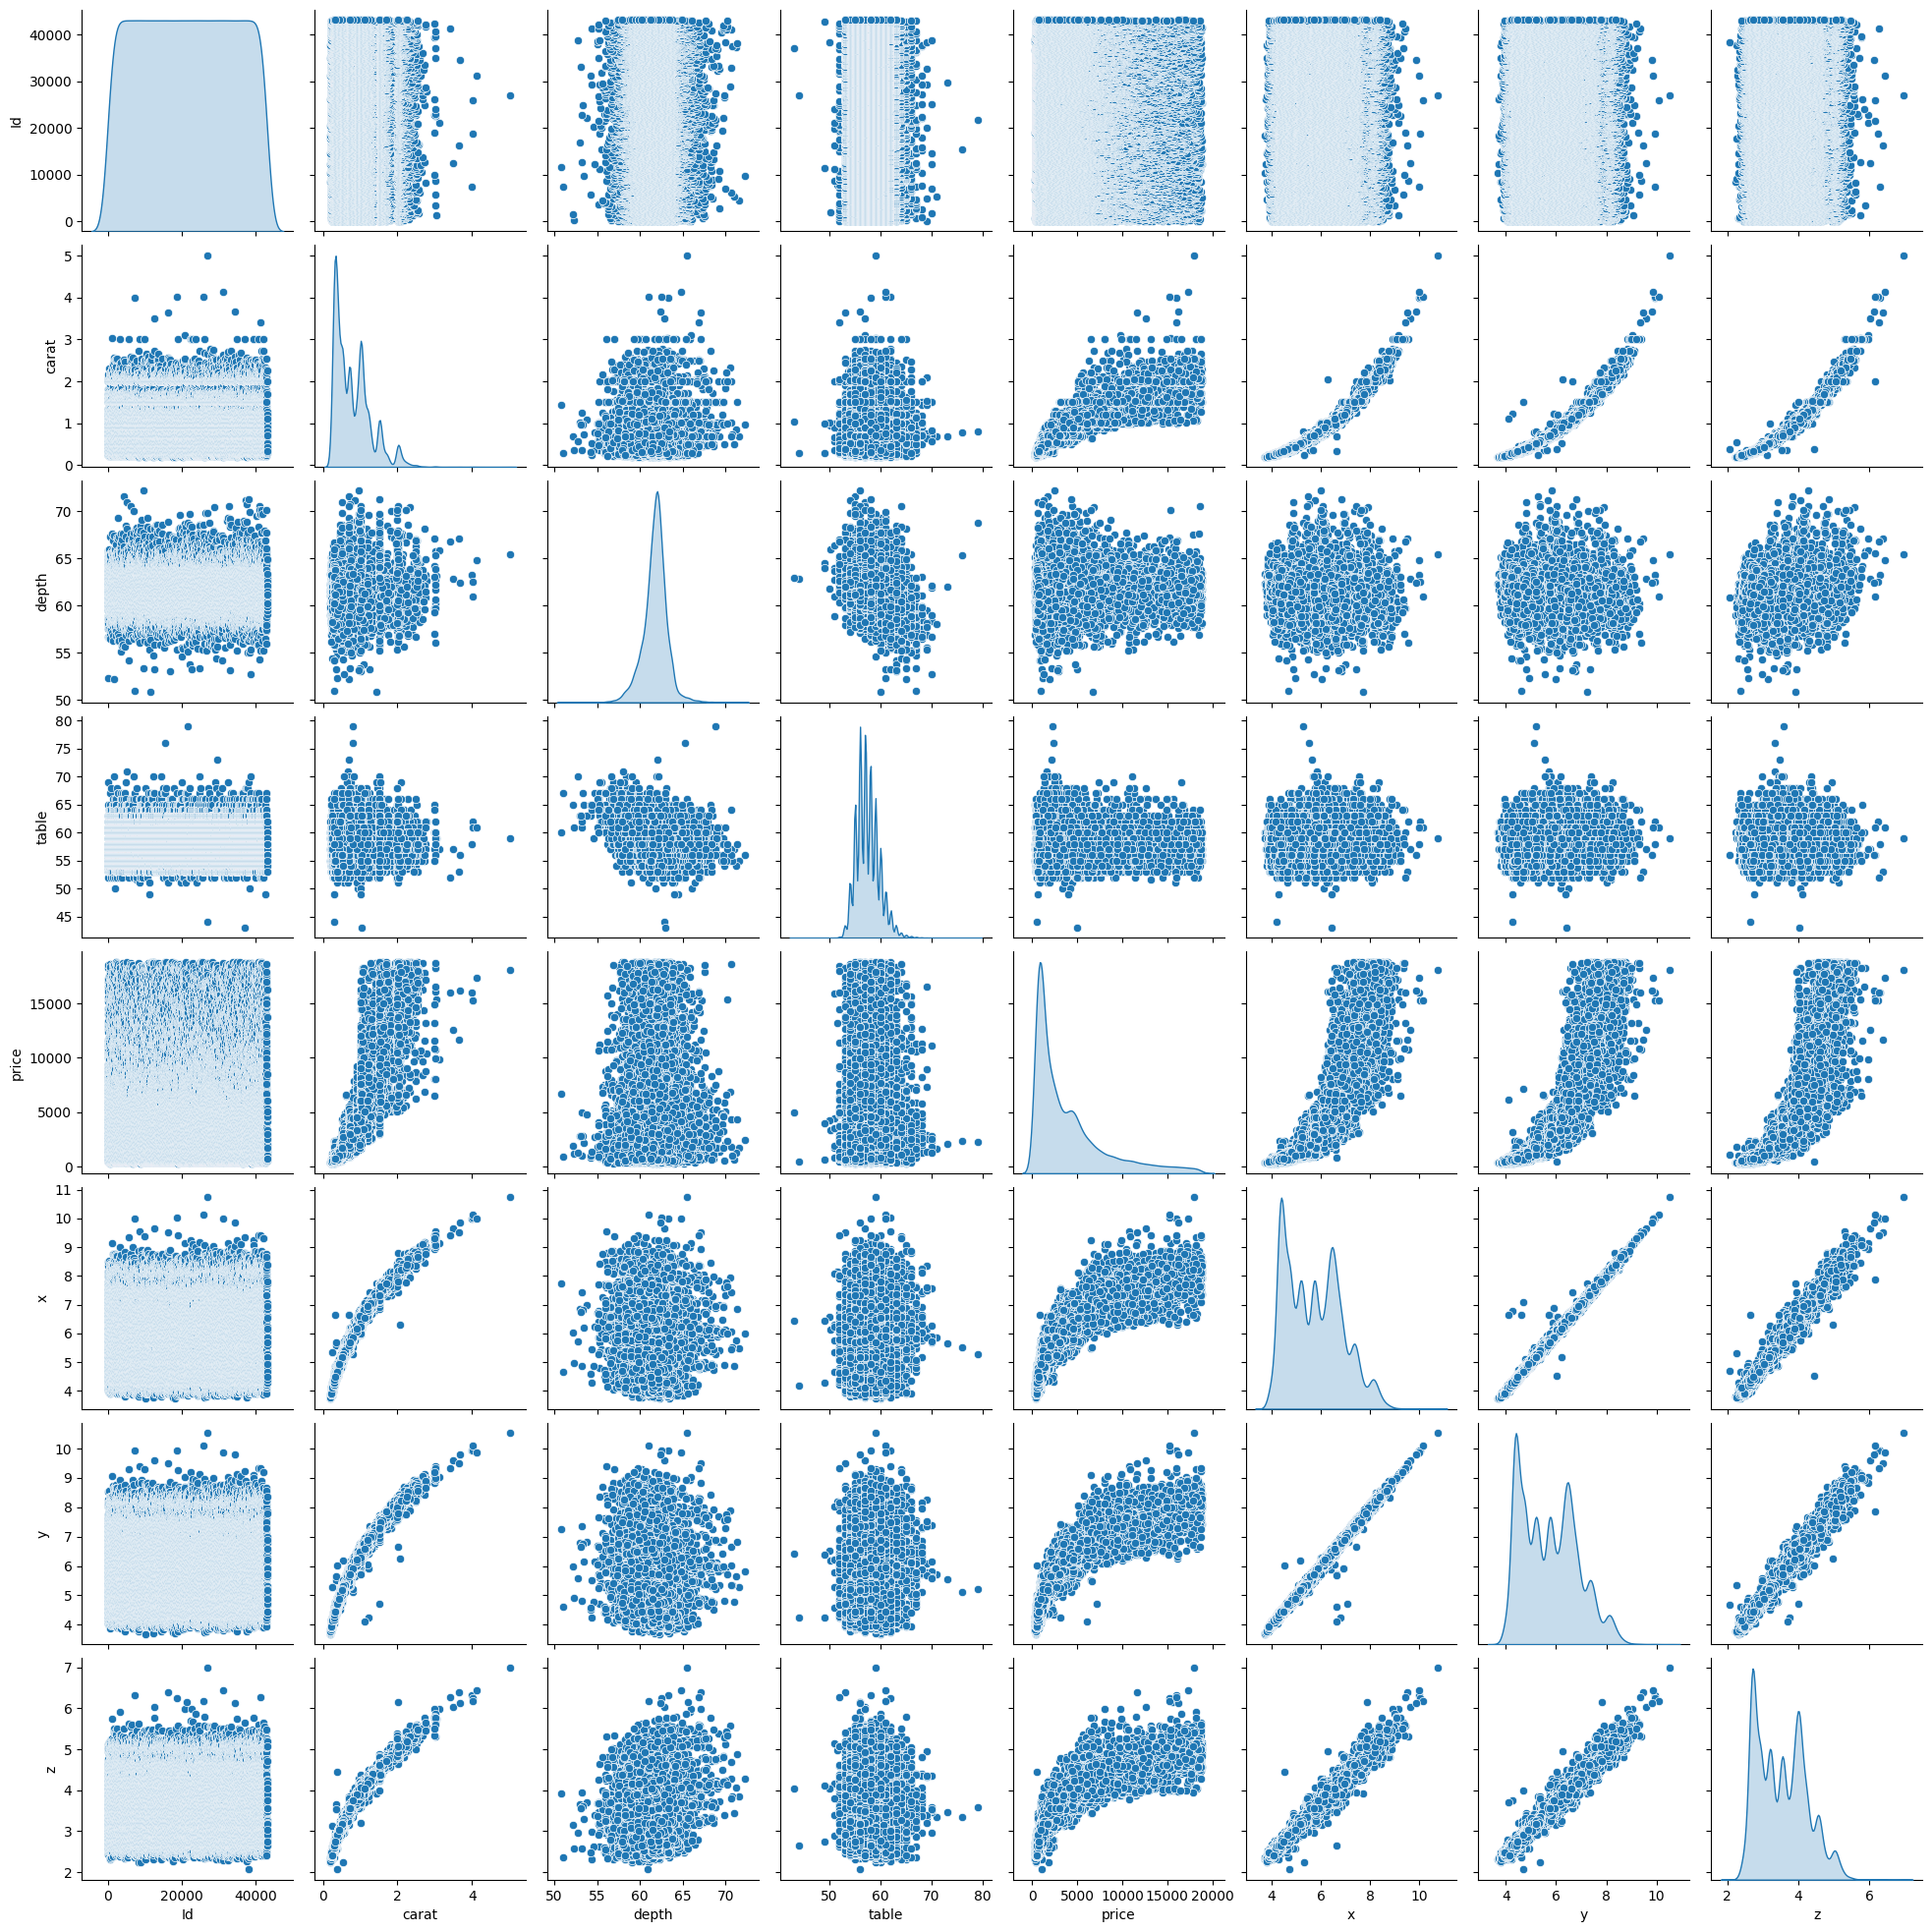

In [19]:
sns.pairplot(train_dataset , diag_kind = 'kde');

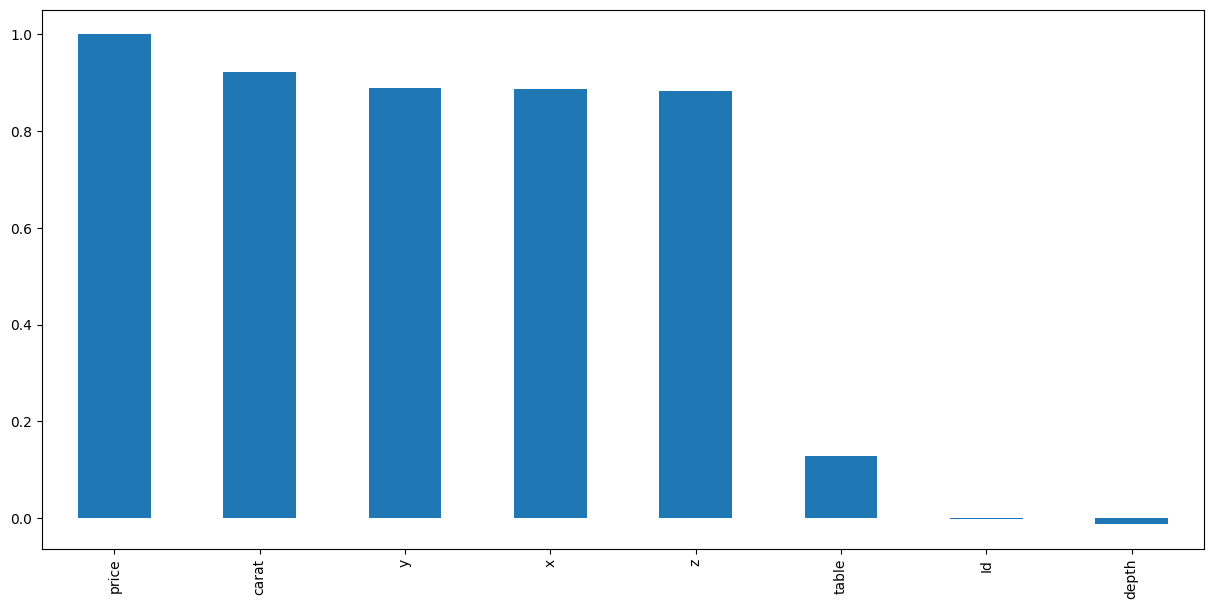

In [20]:
plt.figure(figsize = (15, 7))
correlation_matrix['price'].sort_values(ascending = False).plot(kind = 'bar');

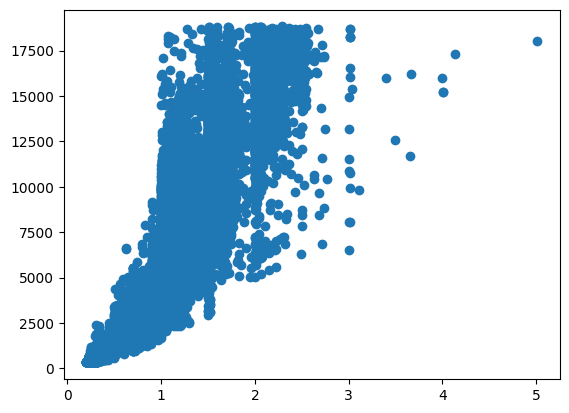

In [21]:
plt.scatter(train_dataset['carat'], train_dataset['price'])

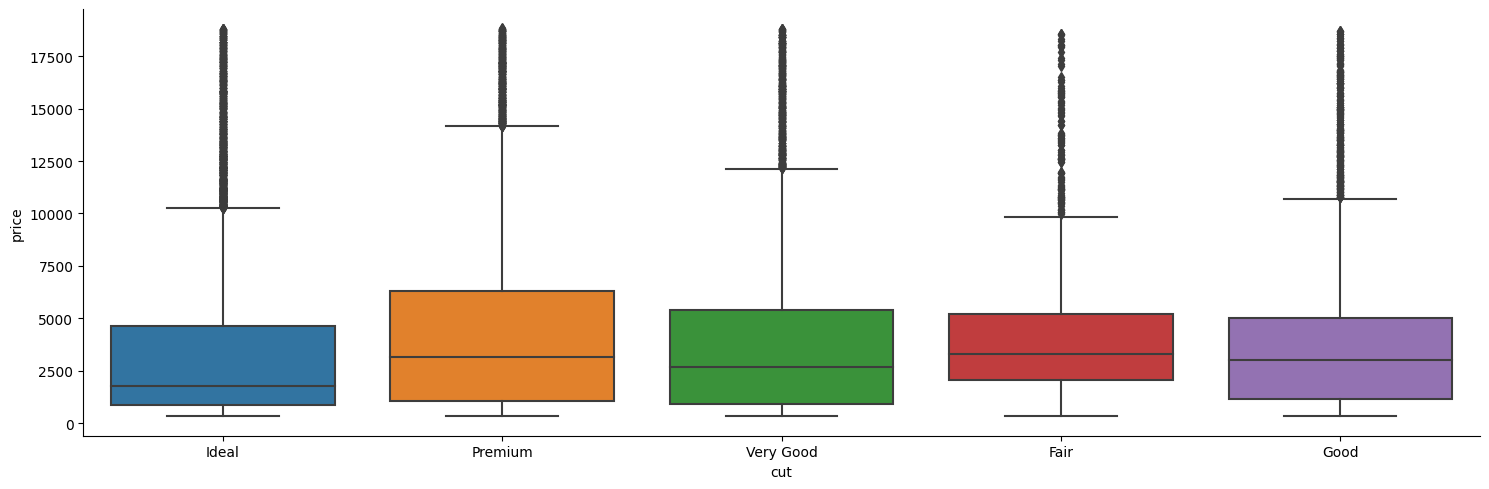

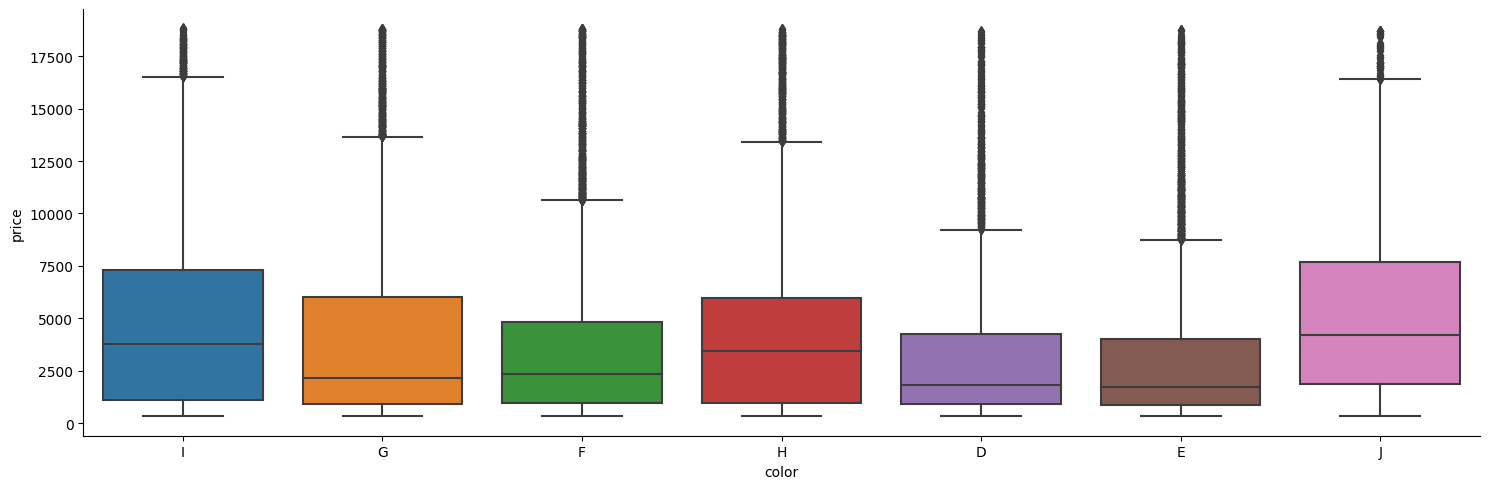

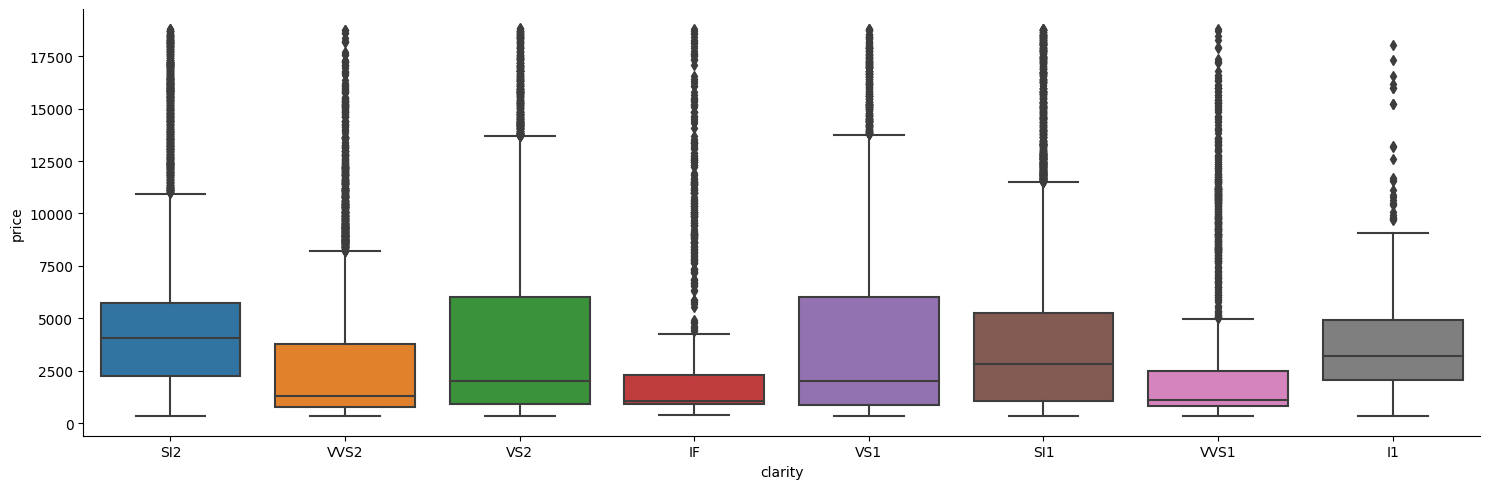

In [22]:
input_cat_columns = train_dataset.select_dtypes(include = ['object']).columns.tolist()

for col in input_cat_columns:
    sns.catplot(x=col, y="price",
            kind="box", dodge=False, height = 5, aspect = 3,data=train_dataset)

<AxesSubplot: >

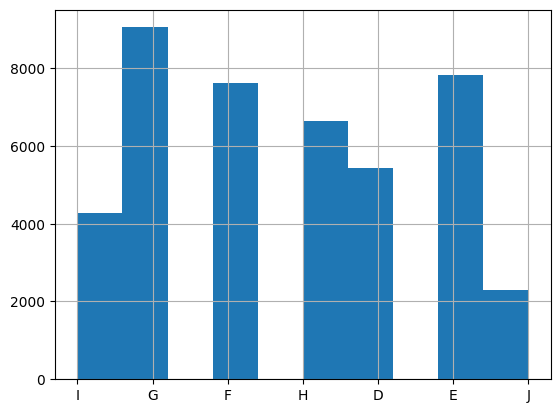

In [23]:
train_dataset['color'].hist()

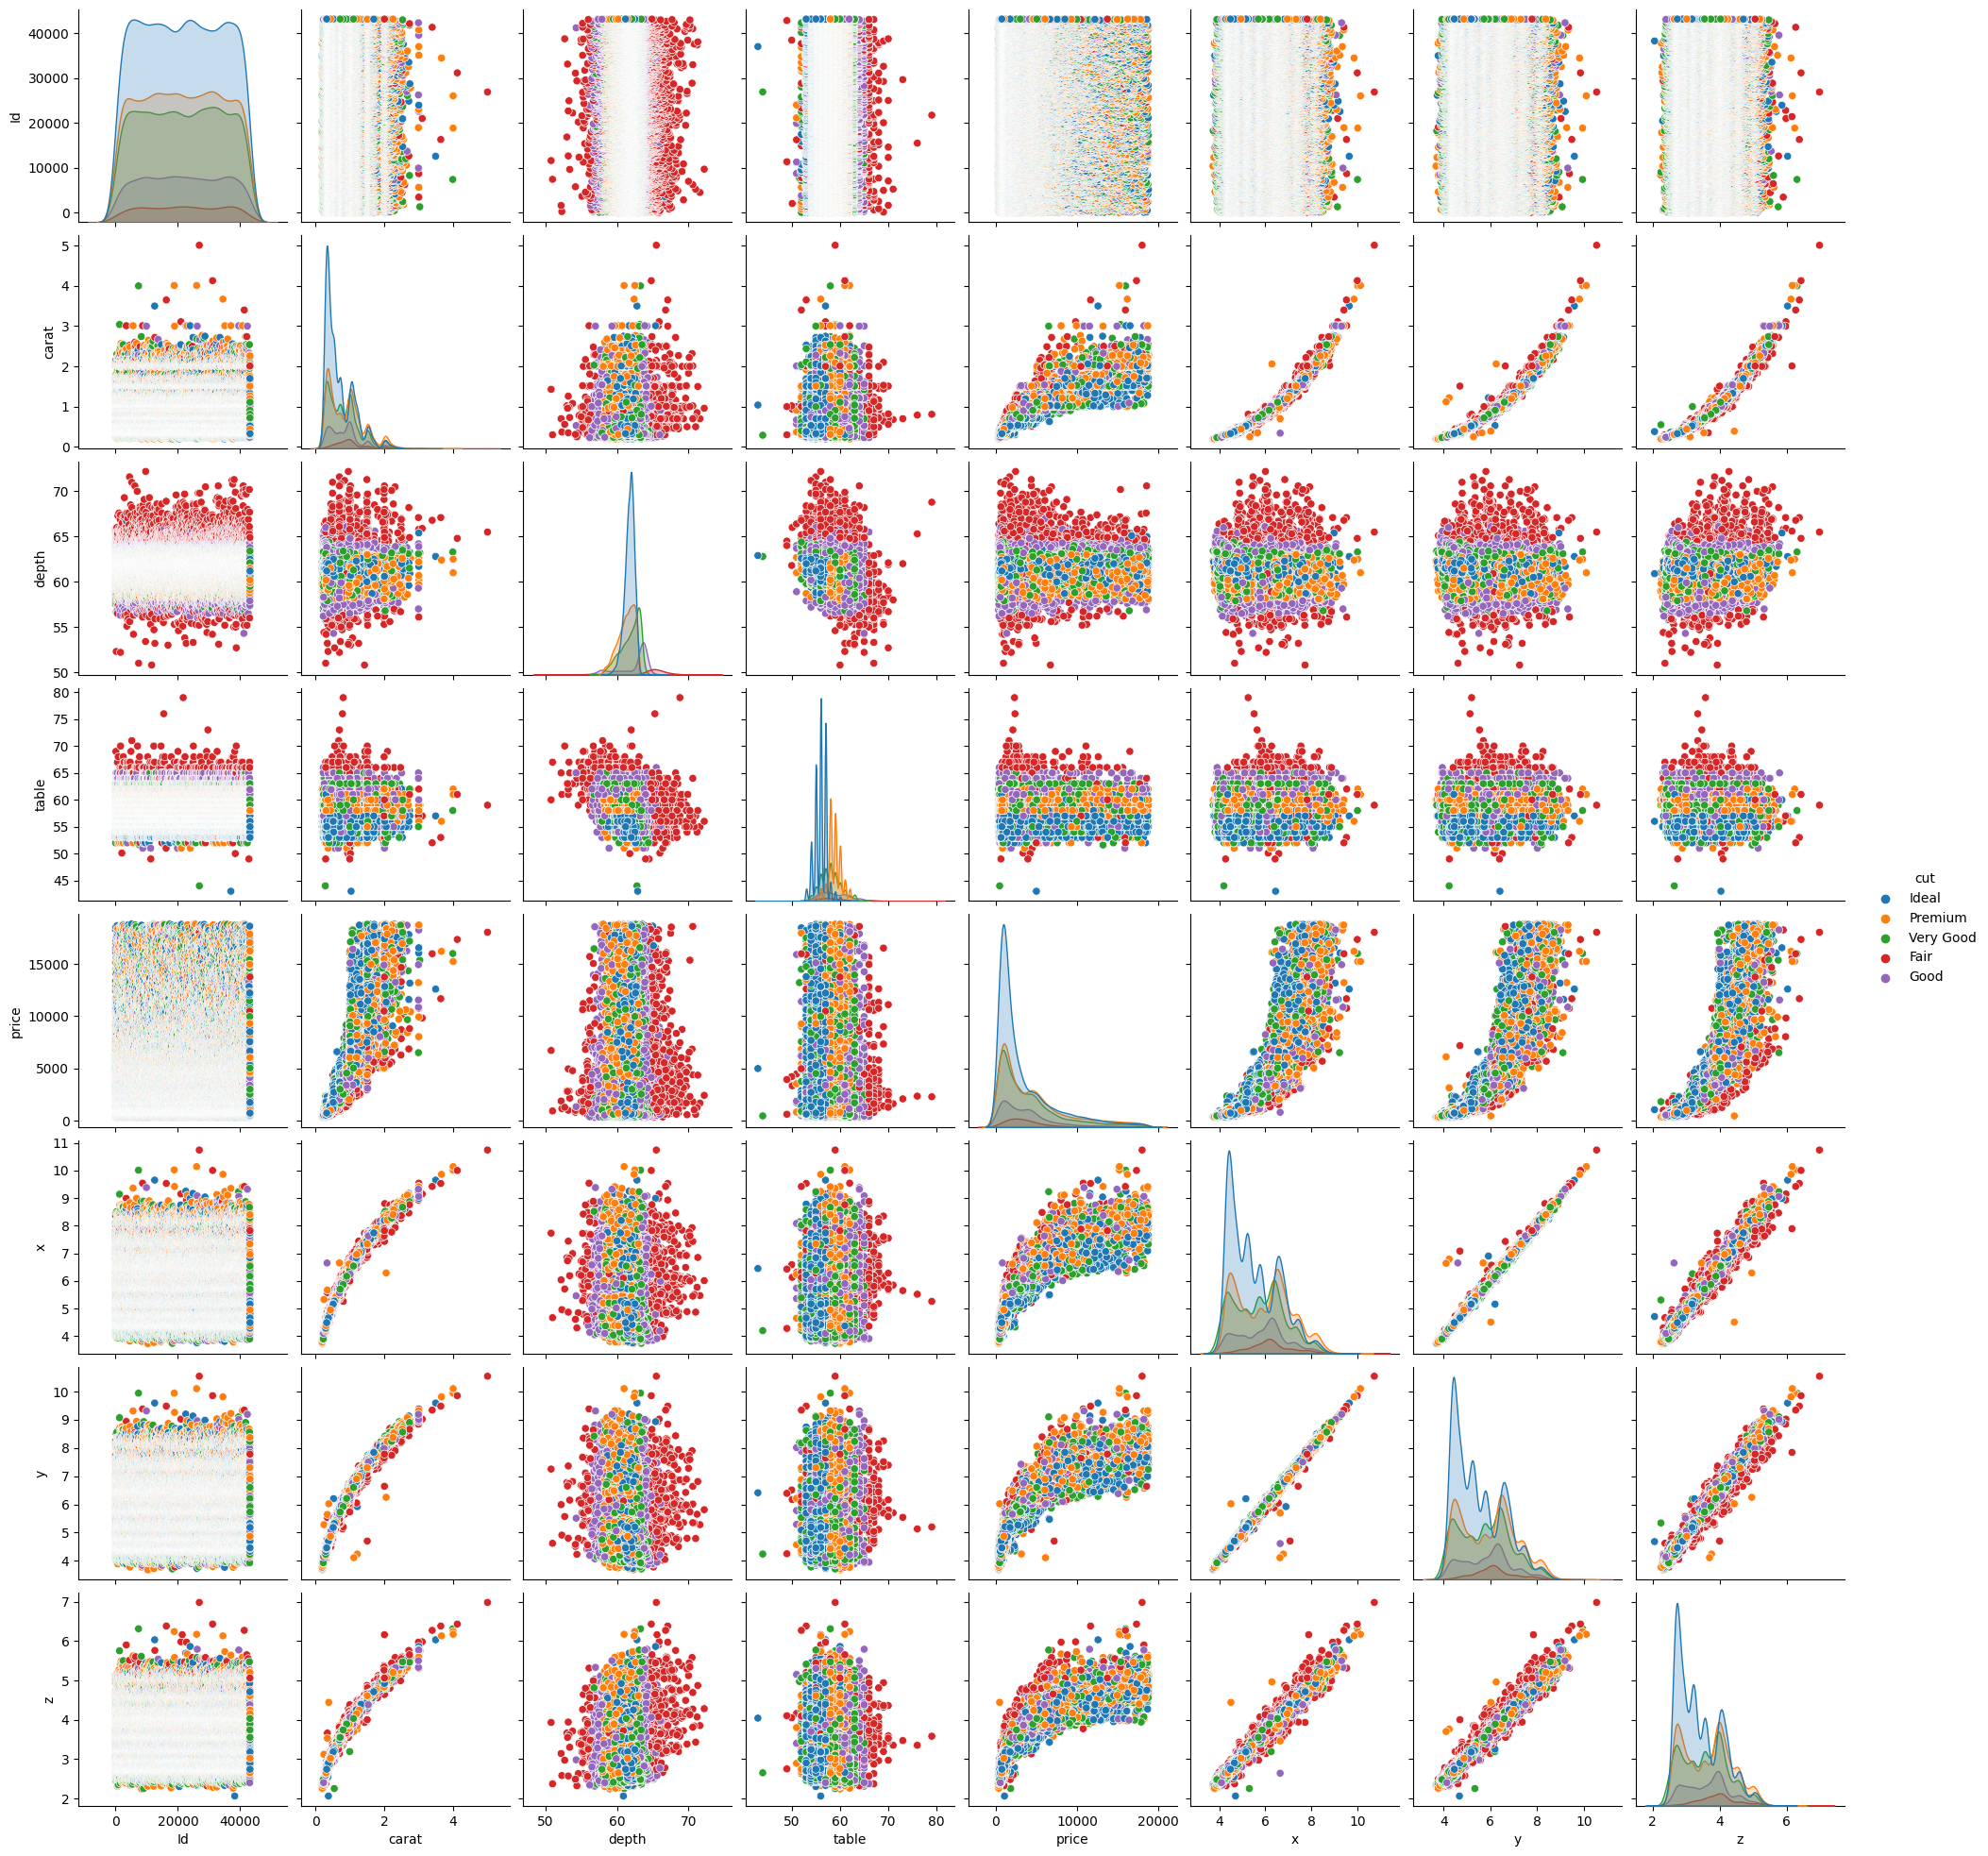

In [24]:
ax=sns.pairplot(train_dataset, hue= "cut")

## **Preprocess and Prepare our Data for the training Phase**

In [25]:
# Get the list of categorical variables
s = (train_dataset.dtypes == "object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [26]:
# Encoding the catogrical data to be an encoded numerical data
def encode_data(dataset:pd.DataFrame()):
    # Make a copy to avoid changing original data 
    label_data = dataset.copy()

    # Apply label encoder to each column with categorical data
    label_encoder = LabelEncoder()

    for col in object_cols:
        label_data[col] = label_encoder.fit_transform(label_data[col])
        
    return label_data

In [27]:
# Encoding our training set
encoded_train_dataset = encode_data(train_dataset)

In [28]:
# Review our statistical info
encoded_train_dataset.describe()

Id         carat           cut         color      clarity  \
count  43123.000000  43123.000000  43123.000000  43123.000000  43123.00000   
mean   21575.797046      0.797483      2.555481      2.593929      3.83183   
std    12456.103541      0.473284      1.026774      1.701988      1.72493   
min        1.000000      0.200000      0.000000      0.000000      0.00000   
25%    10788.500000      0.400000      2.000000      1.000000      2.00000   
50%    21576.000000      0.700000      2.000000      3.000000      4.00000   
75%    32361.500000      1.040000      3.000000      4.000000      5.00000   
max    43152.000000      5.010000      4.000000      6.000000      7.00000   

              depth         table         price             x             y  \
count  43123.000000  43123.000000  43123.000000  43123.000000  43123.000000   
mean      61.748069     57.457178   3927.125432      5.731540      5.733063   
std        1.422251      2.224738   3983.184488      1.119277      1.111284   
min       50.800000     43.000000    326.000000      3.730000      3.680000   
25%       61.000000     56.000000    947.000000      4.710000      4.720000   
50%       61.800000     57.000000   2400.000000      5.700000      5.710000   
75%       62.500000     59.000000   5310.000000      6.540000      6.540000   
max       72.200000     79.000000  18823.000000     10.740000     10.540000   

                  z  
count  43123.000000  
mean       3.539218  
std        0.691029  
min        2.060000  
25%        2.910000  
50%        3.530000  
75%        4.040000  
max        6.980000

<AxesSubplot: >

<Figure size 1500x1200 with 0 Axes>

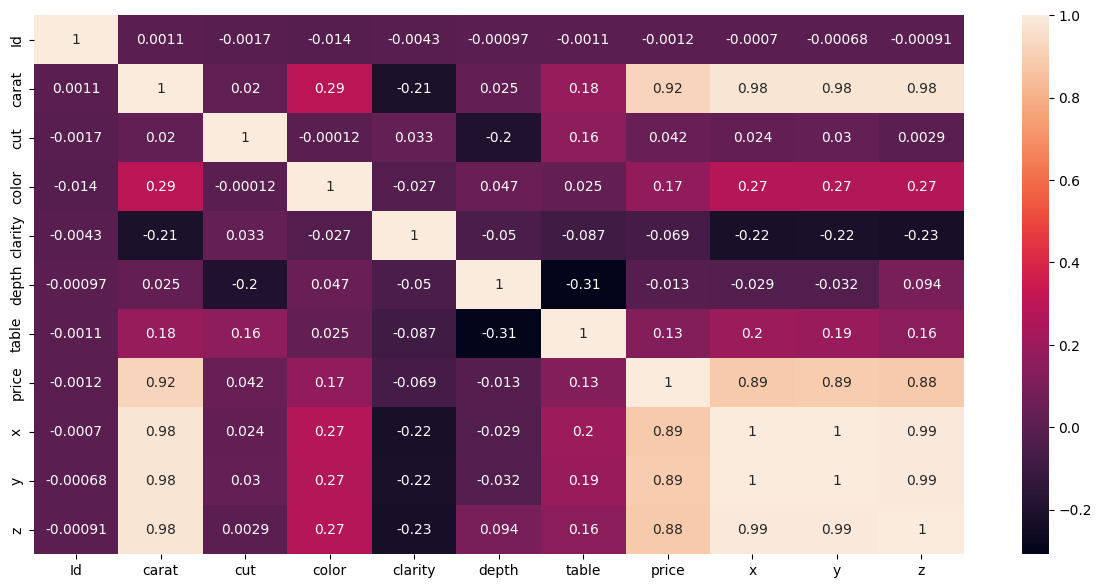

In [29]:
# Reviewing the correlation matrix
plt.figure(figsize = (15, 12))
updated_correlation_matrix= encoded_train_dataset.corr()
f, ax = plt.subplots(figsize=(15,7))
sns.heatmap(updated_correlation_matrix, annot=True,)

In [30]:
encoded_train_dataset = encoded_train_dataset.drop(['Id'], axis=1)

In [31]:
# Assigning the featurs as X and trarget as y
X= encoded_train_dataset.drop(["price"],axis =1)
y= encoded_train_dataset["price"]

In [32]:
# Split the training set to train and test portions to validate our model
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

## **Model Creation**

In [33]:
# Building pipelins of standard scaler and model for varios regressors.
pipeline_lr=Pipeline([("scalar1",RobustScaler()), ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",RobustScaler()), ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",RobustScaler()), ("rf_classifier",RandomForestRegressor())])

pipeline_kn=Pipeline([("scalar4",RobustScaler()), ("rf_classifier",KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scalar5",RobustScaler()), ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {
                0: "LinearRegression", 
                1: "DecisionTreeRegressor", 
                2: 'RandomForestRegressor', 
                3: 'KNeighborsRegressor',
                4: 'XGBRegressor'
}

In [34]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

## **Model Evaluation**

To know which is the best model, we will evaluate all the previous made models and check their Root Squared Mean Error (RSME); the lower is the better.

In [35]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1339.520225 
DecisionTreeRegressor: -776.641410 
RandomForestRegressor: -568.108722 
KNeighborsRegressor: -929.715527 
XGBRegressor: -560.772803 


## **Model Selection**

In [36]:
# Since XGBRegressor model is the lower one, we are going to select it as a winner-model.
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(xgb_pred, y_test))

536.207368075075

In [37]:
# Model Evaluation in varied metrics
print("R^2:",metrics.r2_score(y_test, xgb_pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, xgb_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, xgb_pred))
print("MSE:",metrics.mean_squared_error(y_test, xgb_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

R^2: 0.9817545752205987
Adjusted R^2: 0.9817393297630725
MAE: 277.0619631470847
MSE: 287518.341577999
RMSE: 536.207368075075


## **Predict the diamonds prices of the Testing set of our data**

In [38]:
# Encoding our testing set
encoded_test_dataset = encode_data(dataset=test_dataset)

# Saving the Testing set IDs
encoded_test_dataset_ids = encoded_test_dataset['Id']

# Dropping them
encoded_test_dataset = encoded_test_dataset.drop(["Id"],axis =1)

In [39]:
xgb_test_pred = xgb_model.predict(encoded_test_dataset)

## **Prepare our Submission File (submission.csv)**

In [40]:
df = pd.DataFrame({
    "Id": encoded_test_dataset_ids,
    "price": xgb_test_pred
})

df.to_csv('submission.csv', index=False)